In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle as cp

In [28]:
def merge_dictionary(dict_files):
    dict_res = {}
    for file_name in dict_files:
        if os.path.isfile(file_name):
            with open(file_name, "r") as f:
                dict_res.update(cp.load(f) )
    return dict_res

file_list = ["../results/output_dawn7.pkl",
             "../results/output_dawn17.pkl",
             "../results/output_dawn18.pkl"]
dict_res = merge_dictionary(file_list)

In [29]:
print len(dict_res.keys())
# print dict_res

237


### plot for kernel approximation error

In [30]:
F_norm_exact_kernel = 214056425.586
def get_kernel_approx_error(subkey_list, dict_res):
    kernel_approx_error_list = []
    for key in dict_res.keys():
        is_target = True
        for subkey in subkey_list:
            if subkey not in key:
                is_target = False
                break
        if is_target:
            kernel_approx_error_list.append(np.sqrt(dict_res[key]["train_approx_error"] / F_norm_exact_kernel) )
    return kernel_approx_error_list 

[0.0093319071931297955, 0.0069869976846295622, 0.0033594642517059811]
[0.0065338142799618746, 0.0016486240759262204, 0.002950516399569501]
[0.0059085129260121241, 0.0022879240349850056, 0.0015417650619189355]
[0.0037184633226728069, 0.0026899950078427722, 0.00088799318749161935]
[0.00072355910989043858, 0.0022646358625447193, 0.00044612354568595788]
[0.005363151899240093, 0.0012896254885933626, 0.0022971936877753704]


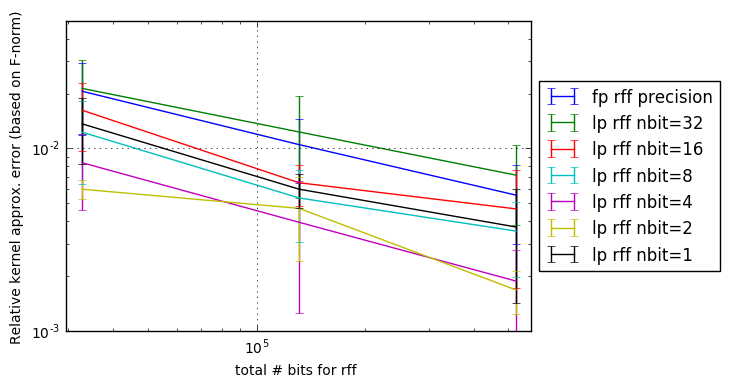

In [31]:
# plot for fixed number of features
fp_bits = 32
plt.figure()
n_feat_list = [1024, 4096, 16384]
# plot full precision kernel approximation
mean_error = []
std_error = []
for n_feat in n_feat_list:
    subkey_list = ["fp_rff_lambda", "n_fp_rff_" + str(n_feat) ]
    fp_approx_error = get_kernel_approx_error(subkey_list, dict_res)
    mean_error.append(np.mean(fp_approx_error) )
    std_error.append(np.std(fp_approx_error) )
#     print len(fp_approx_error)
plt.errorbar(np.array(n_feat_list) * fp_bits, mean_error, yerr=std_error, label="fp rff precision")

# note the error bar need to be replotted due to different number of samples
for n_bit in [32, 16, 8, 4, 2, 1]:
    mean_error = []
    std_error = []
    for n_feat in n_feat_list:
        subkey_list = ["lp_rff_lambda", "n_fp_rff_" + str(n_feat), "nbit_" + str(n_bit) ]
        fp_approx_error = get_kernel_approx_error(subkey_list, dict_res)
        mean_error.append(np.mean(fp_approx_error) )
        std_error.append(np.std(fp_approx_error) )
#         print len(fp_approx_error) 
    print std_error
    plt.errorbar(np.array(n_feat_list) * fp_bits, mean_error, yerr=std_error, label="lp rff nbit="+str(n_bit) )

    
ax = plt.subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.xlabel("total # bits for rff ")
plt.ylabel("Relative kernel approx. error (based on F-norm)")
plt.xlim([n_feat_list[0] * 0.9 * fp_bits, n_feat_list[-1] * 1.1 * fp_bits])
plt.ylim([1e-3, 5e-2])
plt.show()

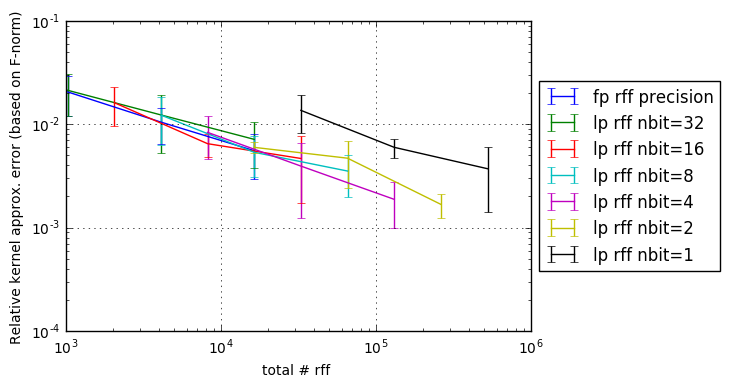

In [32]:
# plot for fixed number of bit budget
fp_bits = 32
plt.figure()
n_feat_list = [1024, 4096, 16384]
# plot full precision kernel approximation
mean_error = []
std_error = []
for n_feat in n_feat_list:
    subkey_list = ["fp_rff_lambda", "n_fp_rff_" + str(n_feat) ]
    fp_approx_error = get_kernel_approx_error(subkey_list, dict_res)
    mean_error.append(np.mean(fp_approx_error) )
    std_error.append(np.std(fp_approx_error) )
#     print len(fp_approx_error)
plt.errorbar(np.array(n_feat_list), mean_error, yerr=std_error, label="fp rff precision")

# note the error bar need to be replotted due to different number of samples
for n_bit in [32, 16, 8, 4, 2, 1]:
    mean_error = []
    std_error = []
    for n_feat in n_feat_list:
        subkey_list = ["lp_rff_lambda", "n_fp_rff_" + str(n_feat), "nbit_" + str(n_bit) ]
        fp_approx_error = get_kernel_approx_error(subkey_list, dict_res)
        mean_error.append(np.mean(fp_approx_error) )
        std_error.append(np.std(fp_approx_error) )
#         print len(fp_approx_error)  
    plt.errorbar(np.array(n_feat_list) * fp_bits / float(n_bit), mean_error, yerr=std_error, label="lp rff nbit="+str(n_bit) )

    
ax = plt.subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.xlabel("total # rff ")
plt.ylabel("Relative kernel approx. error (based on F-norm)")
# plt.xlim([1024 * fp_bytes, 16384 * fp_bytes])
# plt.ylim([1e-3, 5e-2])
plt.show()

### plot for train and test l2 loss

In [33]:
def get_l2_error(subkey_list, dict_res):
    l2_error_train_list = []
    l2_error_test_list = []
    lambda_list = []
    for key in dict_res.keys():
        is_target = True
        for subkey in subkey_list:
            if subkey not in key:
                is_target = False
                break
        if is_target:
            l2_error_train_list.append(np.sqrt(dict_res[key]["train_l2_error"] ) )
            l2_error_test_list.append(np.sqrt(dict_res[key]["test_l2_error"] ) )
            lambda_list.append(float(key.split("_lambda_")[1].split("_")[0]) )
    return l2_error_train_list, l2_error_test_list, lambda_list

exact lambda  0.0005 min/max 10 [0.001, 0.5, 0.0005, 0.005, 1.0, 0.01, 0.05, 5.0, 0.0001, 0.1]
fp  1024  features, lambda  0.05 min/max 10 [0.01, 0.0005, 1.0, 0.5, 5.0, 0.1, 0.05, 0.005, 0.0001, 0.001]
fp  4096  features, lambda  0.001 min/max 10 [5.0, 0.01, 0.0001, 0.05, 0.005, 0.1, 0.0005, 0.5, 1.0, 0.001]
fp  16384  features, lambda  0.001 min/max 10 [0.0005, 0.001, 1.0, 0.5, 0.01, 5.0, 0.1, 0.005, 0.0001, 0.05]
32  bits lp  1024  features, lambda  0.005 min/max 10 [1.0, 5.0, 0.0005, 0.01, 0.001, 0.0001, 0.5, 0.005, 0.1, 0.05]
32  bits lp  4096  features, lambda  0.01 min/max 10 [0.1, 1.0, 5.0, 0.001, 0.5, 0.0001, 0.005, 0.01, 0.05, 0.0005]
32  bits lp  16384  features, lambda  0.001 min/max 10 [0.1, 0.005, 0.0005, 0.001, 0.5, 1.0, 0.01, 5.0, 0.0001, 0.05]
16  bits lp  1024  features, lambda  0.05 min/max 10 [5.0, 0.005, 0.0005, 0.001, 0.05, 0.5, 0.0001, 0.1, 0.01, 1.0]
16  bits lp  4096  features, lambda  0.0005 min/max 10 [0.5, 0.0001, 5.0, 0.05, 0.01, 0.0005, 0.005, 0.1, 1.0, 0.0

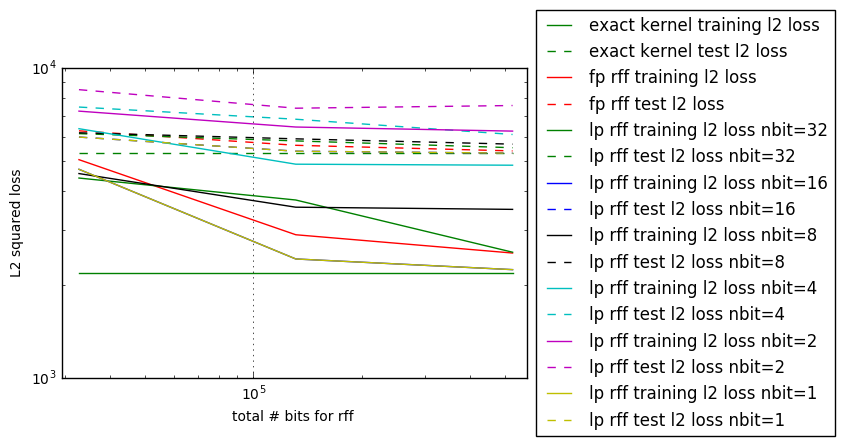

In [34]:
# plot for fixed number of features
fp_bits = 32
plt.figure()
n_feat_list = [1024, 4096, 16384]
# get exact kernel info
subkey_list = ["exact",]
l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, dict_res)
l2_train_list = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
l2_test_list = [np.min(l2_test), ] * len(n_feat_list)
print "exact lambda ", lambda_list[np.argmin(l2_test) ], "min/max", \
    len(lambda_list), lambda_list#     np.min(lambda_list), np.max(lambda_list)
plt.plot(np.array(n_feat_list) * fp_bits, l2_train_list, "g", label="exact kernel training l2 loss")
plt.plot(np.array(n_feat_list) * fp_bits, l2_test_list, "g--", label="exact kernel test l2 loss")

# plot full precision kernel approximation
l2_train_list = []
l2_test_list = []
for n_feat in n_feat_list:
    subkey_list = ["fp_rff_lambda", "n_fp_rff_" + str(n_feat) ]
    l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, dict_res)
    l2_train_list.append(l2_train[np.argmin(l2_test) ] )
    l2_test_list.append(np.min(l2_test) )
    print "fp ", n_feat, " features, lambda ", lambda_list[np.argmin(l2_test) ], "min/max", \
        len(lambda_list), lambda_list#         np.min(lambda_list), np.max(lambda_list)

plt.plot(np.array(n_feat_list) * fp_bits, l2_train_list, "r", label="fp rff training l2 loss")
plt.plot(np.array(n_feat_list) * fp_bits, l2_test_list, "r--", label="fp rff test l2 loss")

colors = ["g", 'b', 'k', 'c', 'm', 'y']
# note the error bar need to be replotted due to different number of samples
for i, n_bit in enumerate( [32, 16, 8, 4, 2, 1] ):
    l2_train_list = []
    l2_test_list = []
    for n_feat in n_feat_list:
        subkey_list = ["lp_rff_lambda", "n_fp_rff_" + str(n_feat), "nbit_" + str(n_bit) ]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, dict_res)
        l2_train_list.append(l2_train[np.argmin(l2_test) ] )
        l2_test_list.append(np.min(l2_test) )
        print n_bit, " bits lp ", n_feat, " features, lambda ", lambda_list[np.argmin(l2_test) ], "min/max", \
            len(lambda_list), lambda_list#             np.min(lambda_list), np.max(lambda_list)

#     plt.errorbar(np.array(n_feat_list) * fp_bits, mean_error, yerr=std_error, label="lp rff nbit="+str(n_bit) )
    plt.plot(np.array(n_feat_list) * fp_bits, l2_train_list, colors[i], label="lp rff training l2 loss nbit=" + str(n_bit))
    plt.plot(np.array(n_feat_list) * fp_bits, l2_test_list, colors[i] + "--", label="lp rff test l2 loss nbit=" + str(n_bit))

    
ax = plt.subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.xlabel("total # bits for rff ")
plt.ylabel("L2 squared loss")
plt.xlim([n_feat_list[0] * 0.9 * fp_bits, n_feat_list[-1] * 1.1 * fp_bits])
plt.ylim([1e3, 1e4])
plt.show()

In [22]:
# # plot for fixed number of features
# fp_bits = 32
# plt.figure()
# n_feat_list = [1024, 4096, 16384]
# # plot full precision kernel approximation
# l2_train_list = []
# l2_test_list = []
# for n_feat in n_feat_list:
#     subkey_list = ["fp_rff_lambda", "n_fp_rff_" + str(n_feat) ]
#     l2_train, l2_test  = get_l2_error(subkey_list, dict_res)
#     l2_train_list.append(l2_train[np.argmin(l2_test) ] )
#     l2_test_list.append(np.min(l2_test) )

# plt.plot(np.array(n_feat_list), l2_train_list, "r", label="fp rff training l2 loss")
# plt.plot(np.array(n_feat_list), l2_test_list, "r--", label="fp rff test l2 loss")

# colors = ["g", 'b', 'k', 'c', 'm', 'y']
# # note the error bar need to be replotted due to different number of samples
# for i, n_bit in enumerate( [32, 16, 8, 4, 2, 1] ):
#     l2_train_list = []
#     l2_test_list = []
#     for n_feat in n_feat_list:
#         subkey_list = ["lp_rff_lambda", "n_fp_rff_" + str(n_feat), "nbit_" + str(n_bit) ]
#         l2_train, l2_test  = get_l2_error(subkey_list, dict_res)
#         l2_train_list.append(l2_train[np.argmin(l2_test) ] )
#         l2_test_list.append(np.min(l2_test) )
# #     plt.errorbar(np.array(n_feat_list) * fp_bits, mean_error, yerr=std_error, label="lp rff nbit="+str(n_bit) )
#     plt.plot(np.array(n_feat_list) * fp_bits / float(n_bit), l2_train_list, colors[i], label="lp rff training l2 loss nbit=" + str(n_bit))
#     plt.plot(np.array(n_feat_list) * fp_bits / float(n_bit), l2_test_list, colors[i] + "--", label="lp rff test l2 loss nbit=" + str(n_bit))

    
# ax = plt.subplot(111)
# ax.set_xscale("log")
# ax.set_yscale("log")
# plt.grid()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
# plt.xlabel("total # of rff ")
# plt.ylabel("L2 squared loss")
# # plt.xlim([n_feat_list[0] * 0.9 * fp_bits, n_feat_list[-1] * 1.1 * fp_bits])
# plt.ylim([1e3, 1e4])
# plt.show()

ValueError: too many values to unpack

# Code below are not useful

### plot exact kernel v.s. regularizer (kernel approximation error, L2 loss)

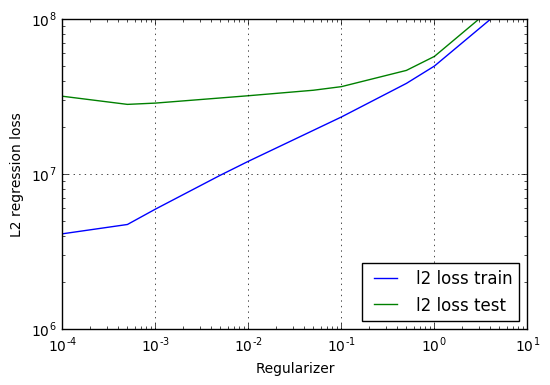

In [32]:
reg_lambda_list = []
l2_error_train_list = []
l2_error_test_list = []
tmp_dict = []
for key in dict_res.keys():
    if "exact" in key:
        tmp_dict.append((key, dict_res[key] ) )
tmp_dict = sorted(tmp_dict, key=lambda x: float(x[0].split("_lambda_")[1].split("_")[0] ))
for item in tmp_dict:
    reg_lambda = float(item[0].split("_lambda_")[1].split("_")[0] )
    reg_lambda_list.append(reg_lambda)
    l2_error_train_list.append(item[1]["train_l2_error"] )
    l2_error_test_list.append(item[1]["test_l2_error"] )        
plt.figure()
plt.loglog(reg_lambda_list, l2_error_train_list, label="l2 loss train")
plt.loglog(reg_lambda_list, l2_error_test_list, label="l2 loss test")
plt.xlabel("Regularizer")
plt.ylabel("L2 regression loss")
plt.ylim([1e6, 1e8])
plt.grid()
plt.legend(loc="lower right")
plt.show()        

### plot fp kernel v.s. exact kernel (of best regularizer)

('using n feature ', 1024)


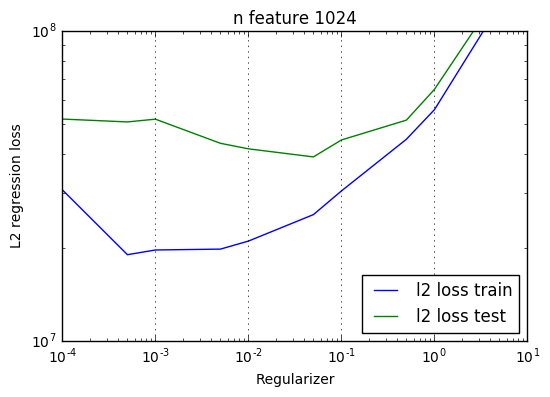

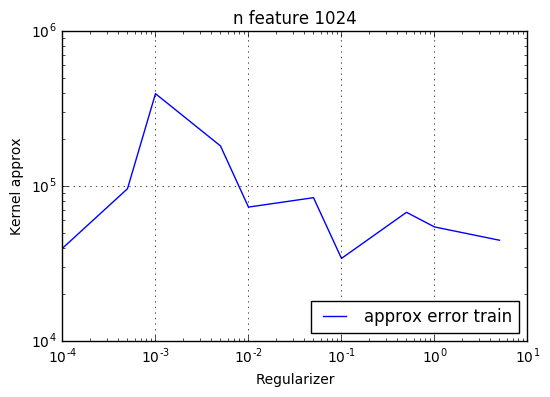

('using n feature ', 4096)


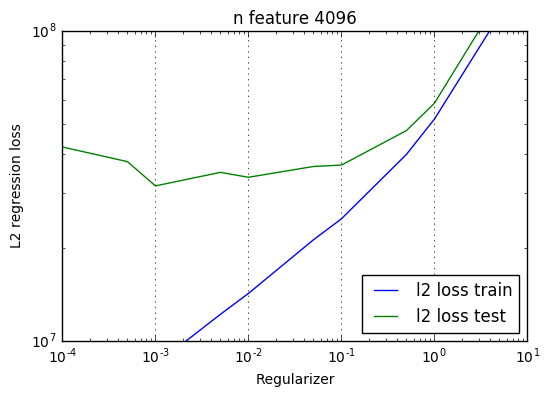

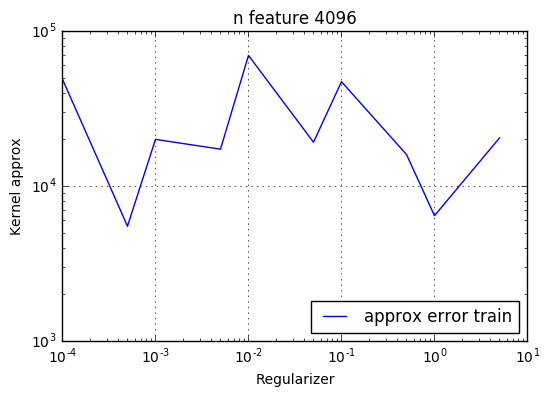

('using n feature ', 16384)


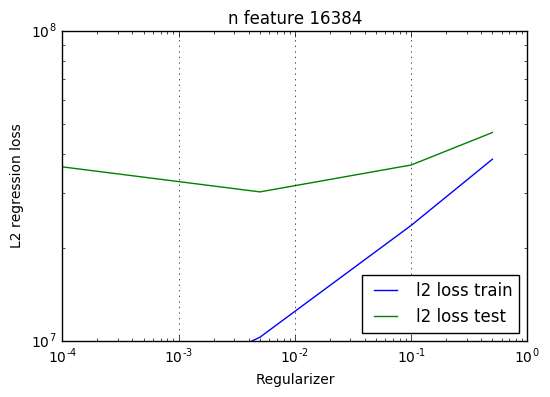

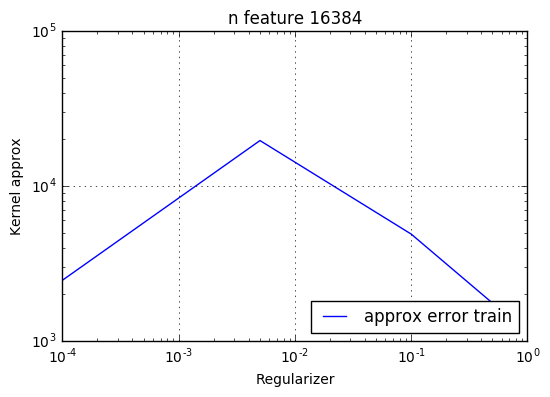

('using n feature ', 65536)
('using n feature ', 262144)
('using n feature ', 1048576)


In [48]:
def get_fp_rff_res(n_feat):
    reg_lambda_list = []
    l2_error_train_list = []
    l2_error_test_list = []
    approx_error_train_list = []
    tmp_dict = []
    for key in dict_res.keys():
        if key.startswith("fp") and "n_fp_rff_" + str(n_feat) in key:
            tmp_dict.append((key, dict_res[key] ) )
    tmp_dict = sorted(tmp_dict, key=lambda x: float(x[0].split("_lambda_")[1].split("_")[0] ))  
#     print tmp_dict
#     raw_input()
    for item in tmp_dict:
        reg_lambda = float(item[0].split("_lambda_")[1].split("_")[0] )
        reg_lambda_list.append(reg_lambda)
        l2_error_train_list.append(item[1]["train_l2_error"] )
        l2_error_test_list.append(item[1]["test_l2_error"] )
        approx_error_train_list.append(item[1]["train_approx_error"])
    return reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list

for n_feat in [1024, 4096, 16384, 65536, 262144, 1048576]:
    reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list = \
        get_fp_rff_res(n_feat)
    print("using n feature ", n_feat)
    if len(reg_lambda_list) == 0:
        continue
    plt.figure()
    plt.loglog(reg_lambda_list, l2_error_train_list, label="l2 loss train")
    plt.loglog(reg_lambda_list, l2_error_test_list, label="l2 loss test")
    plt.xlabel("Regularizer")
    plt.ylabel("L2 regression loss")
    plt.title("n feature " + str(n_feat))
    plt.ylim([1e7, 1e8])
    plt.grid()
    plt.legend(loc="lower right")
    plt.show()

    plt.figure()
    plt.loglog(reg_lambda_list, approx_error_train_list, label="approx error train")
    plt.xlabel("Regularizer")
    plt.ylabel("Kernel approx")
    plt.title("n feature " + str(n_feat))
    plt.grid()
    plt.legend(loc="lower right")
    plt.show()

### plot fp kernel v.s. lp kernel (of best regularizer)

('using n feature / n bit', 1024, 16)


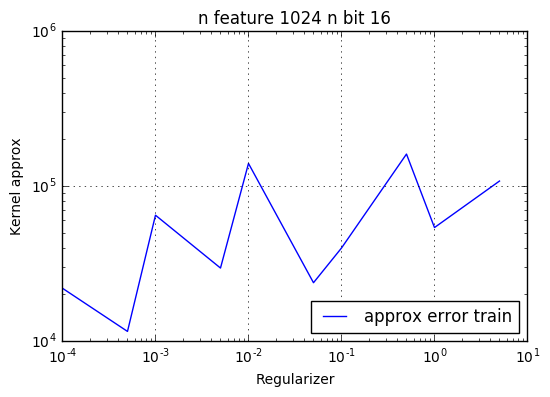

('using n feature / n bit', 4096, 16)


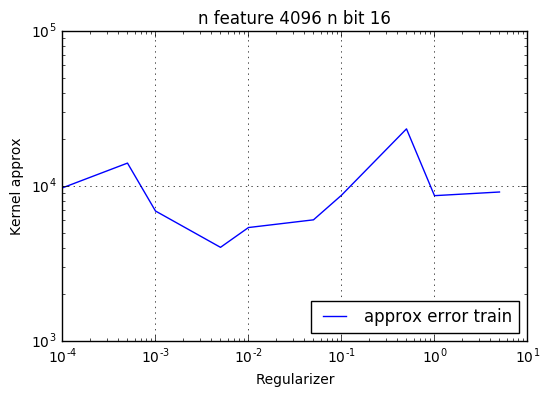

('using n feature / n bit', 16384, 16)


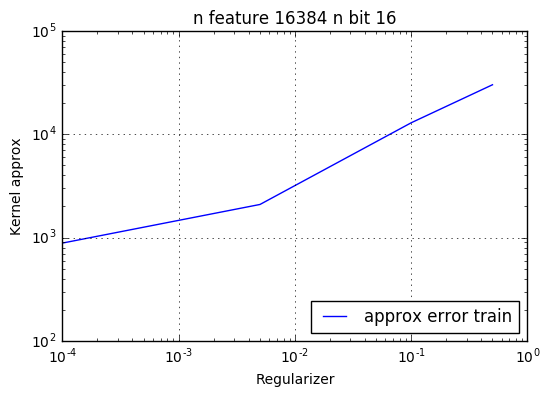

('using n feature / n bit', 65536, 16)
('using n feature / n bit', 262144, 16)
('using n feature / n bit', 1048576, 16)
('using n feature / n bit', 1024, 8)


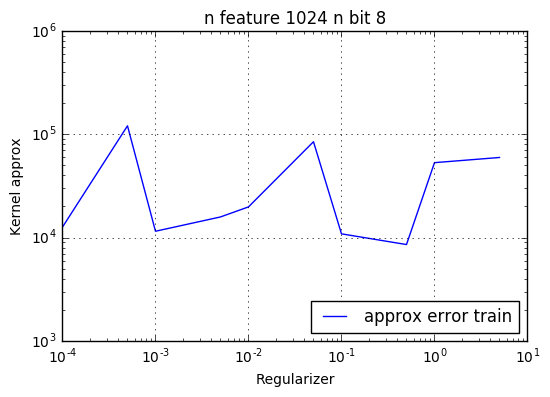

('using n feature / n bit', 4096, 8)


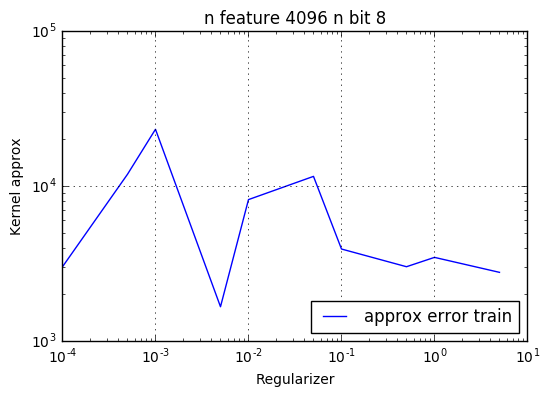

('using n feature / n bit', 16384, 8)


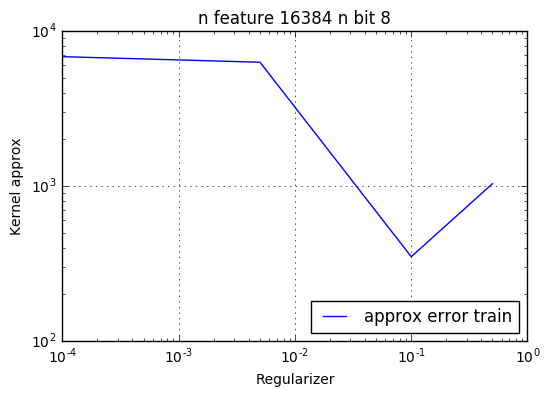

('using n feature / n bit', 65536, 8)
('using n feature / n bit', 262144, 8)
('using n feature / n bit', 1048576, 8)
('using n feature / n bit', 1024, 4)


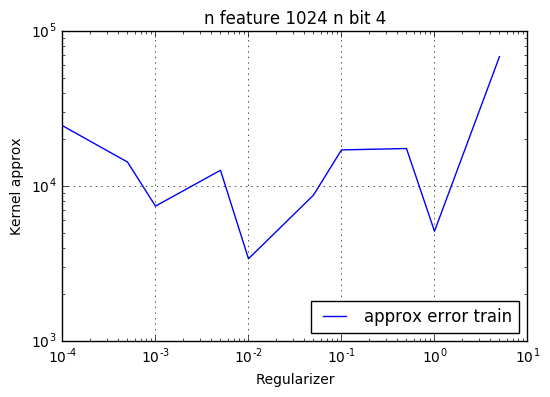

('using n feature / n bit', 4096, 4)


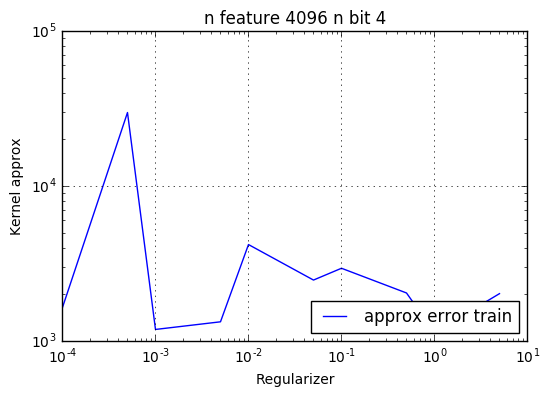

('using n feature / n bit', 16384, 4)


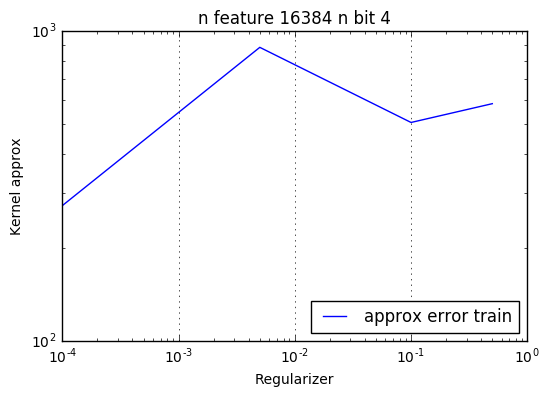

('using n feature / n bit', 65536, 4)
('using n feature / n bit', 262144, 4)
('using n feature / n bit', 1048576, 4)
('using n feature / n bit', 1024, 2)


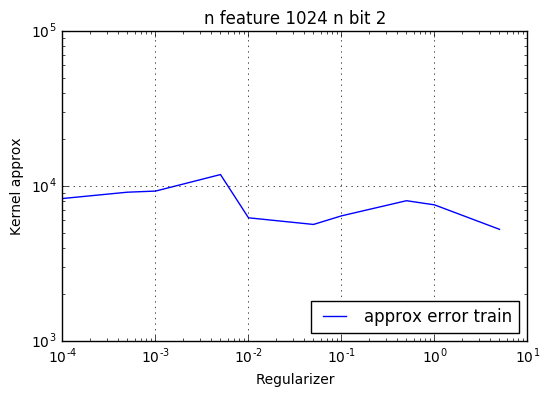

('using n feature / n bit', 4096, 2)


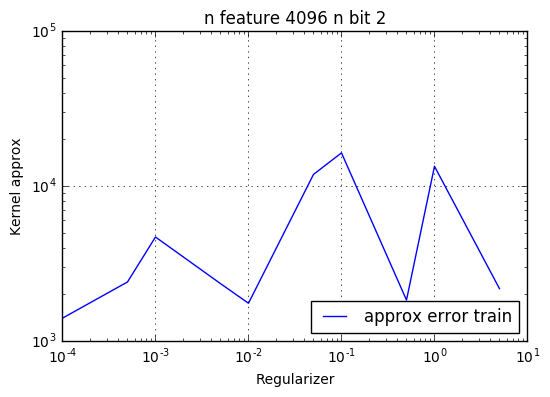

('using n feature / n bit', 16384, 2)


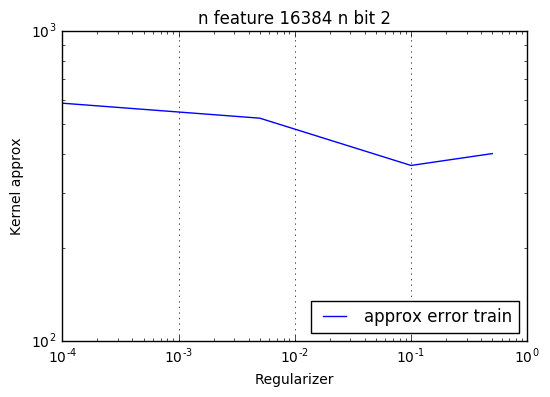

('using n feature / n bit', 65536, 2)
('using n feature / n bit', 262144, 2)
('using n feature / n bit', 1048576, 2)
('using n feature / n bit', 1024, 1)


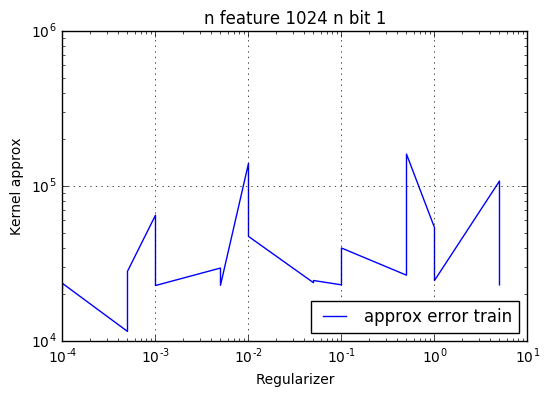

('using n feature / n bit', 4096, 1)


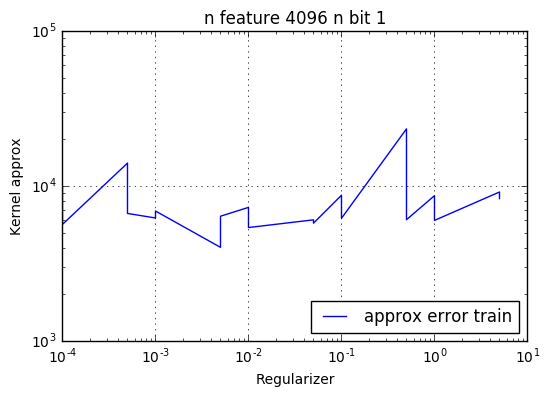

('using n feature / n bit', 16384, 1)


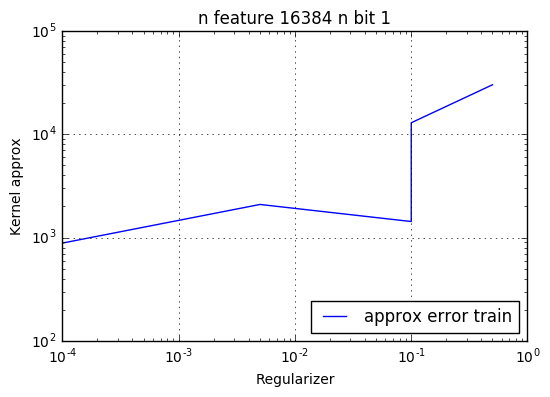

('using n feature / n bit', 65536, 1)
('using n feature / n bit', 262144, 1)
('using n feature / n bit', 1048576, 1)


In [49]:
def get_lp_rff_res(n_feat, n_bit):
    reg_lambda_list = []
    l2_error_train_list = []
    l2_error_test_list = []
    approx_error_train_list = []
    tmp_dict = []
    for key in dict_res.keys():
        if key.startswith("lp") and "n_fp_rff_" + str(n_feat) in key and "nbit_" + str(n_bit) in key:
            tmp_dict.append((key, dict_res[key] ) )
    tmp_dict = sorted(tmp_dict, key=lambda x: float(x[0].split("_lambda_")[1].split("_")[0] ))  
#     print tmp_dict
#     raw_input()
    for item in tmp_dict:
        reg_lambda = float(item[0].split("_lambda_")[1].split("_")[0] )
        reg_lambda_list.append(reg_lambda)
        l2_error_train_list.append(item[1]["train_l2_error"] )
        l2_error_test_list.append(item[1]["test_l2_error"] )
        approx_error_train_list.append(item[1]["train_approx_error"])
    return reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list

for n_bit in [16, 8, 4, 2, 1]:
    for n_feat in [1024, 4096, 16384, 65536, 262144, 1048576]:
        reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list = \
            get_lp_rff_res(n_feat, n_bit)
        print("using n feature / n bit", n_feat, n_bit)
        if len(reg_lambda_list) == 0:
            continue
#         plt.figure()
#         plt.loglog(reg_lambda_list, l2_error_train_list, label="l2 loss train")
#         plt.loglog(reg_lambda_list, l2_error_test_list, label="l2 loss test")
#         plt.xlabel("Regularizer")
#         plt.ylabel("L2 regression loss")
#         plt.title("n feature " + str(n_feat) + " n bit " + str(n_bit) )
#         plt.ylim([1e6, 1e8])
#         plt.grid()
#         plt.legend(loc="lower right")
#         plt.show()

#         plt.figure()
#         plt.loglog(reg_lambda_list, approx_error_train_list, label="approx error train")
#         plt.xlabel("Regularizer")
#         plt.ylabel("Kernel approx")
#         plt.title("n feature " + str(n_feat) + " n bit " + str(n_bit) )
#         plt.grid()
#         plt.legend(loc="lower right")
#         plt.show()

### plot fp kernel (of best regularizer) v.s. exact kernel (of best regularizer)